# CNN Lab for Pre-Jedi : Dataset Preparation

### **Import all the required packages**

In [3]:
# array number
import numpy as np
# data frame
import pandas as pd
# plot basic graph
import matplotlib.pyplot as plt
# call path
from pathlib import Path
import os
from sklearn.model_selection import train_test_split
# plot advance graph
import seaborn as sns
# copy file contents
from shutil import copyfile
# progress bar
from tqdm import tqdm

### Variable Monitoring

In [4]:
DATASET_DIRECTORY = './datasets/image'
TRAIN_DIRECTORY = './datasets//train'
TEST_DIRECTORY = './datasets/test'
VAL_DIRECTORY = './datasets/val'
TRAIN_SIZE = 0.8  
VALIDATION_SIZE = 0.1 
TEST_SIZE = 0.1

### **Dataset Preparation**

In [5]:
image_dir = Path(DATASET_DIRECTORY)
# glob() Find files
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.PNG'))
#split filename and path
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

image_df = image_df.drop_duplicates(subset=['Filepath', 'Label'])

print(f"Datasets amount = {len(image_df)}")

Datasets amount = 9882


In [12]:
labels_desired = image_df['Label'].isin(["target", "non-target"])
image_df = image_df[labels_desired].reset_index(drop=True)
image_df

,Filepath,Label
0,datasets\image\non-target\AlgalLeafSpot001_jpg...,non-target
1,datasets\image\non-target\AlgalLeafSpot002_jpg...,non-target
2,datasets\image\non-target\AlgalLeafSpot003_jpg...,non-target
3,datasets\image\non-target\AlgalLeafSpot004_jpg...,non-target
4,datasets\image\non-target\AlgalLeafSpot005_jpg...,non-target
...,...,...
9877,datasets\image\target\other_diseases_95.jpg,target
9878,datasets\image\target\other_diseases_96.jpg,target
9879,datasets\image\target\other_diseases_97.jpg,target
9880,datasets\image\target\other_diseases_98.jpg,target


In [5]:
image_df_label_counts = image_df['Label'].value_counts()

print("Dataset:")
print(image_df_label_counts)

Dataset:
non-target    5420
target        4462
Name: Label, dtype: int64


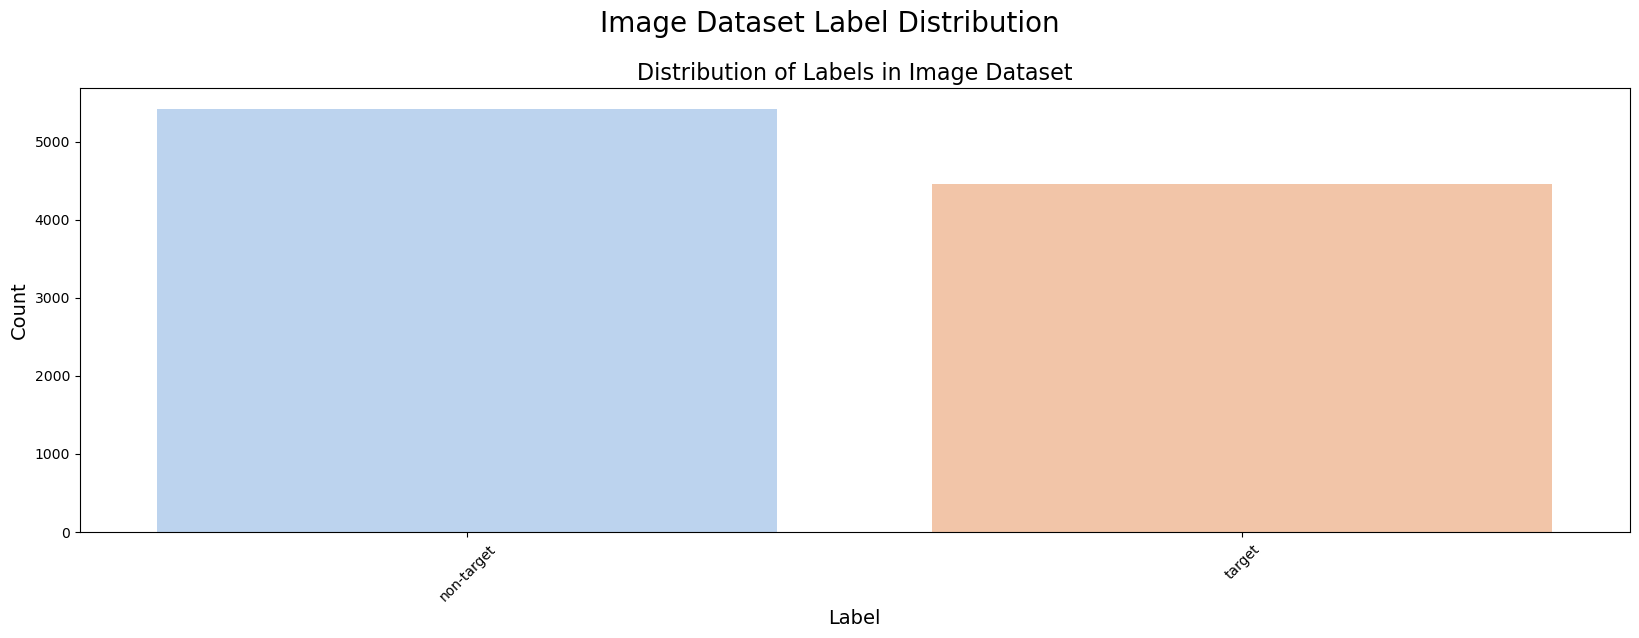

In [6]:
label_counts = image_df['Label'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='pastel', ax=axes)
axes.set_title('Distribution of Labels in Image Dataset', fontsize=16)
axes.set_xlabel('Label', fontsize=14)
axes.set_ylabel('Count', fontsize=14)
axes.set_xticklabels(label_counts.index, rotation=45)

fig.suptitle('Image Dataset Label Distribution', fontsize=20)

fig.subplots_adjust(top=0.85)

# Display the plot
plt.show()

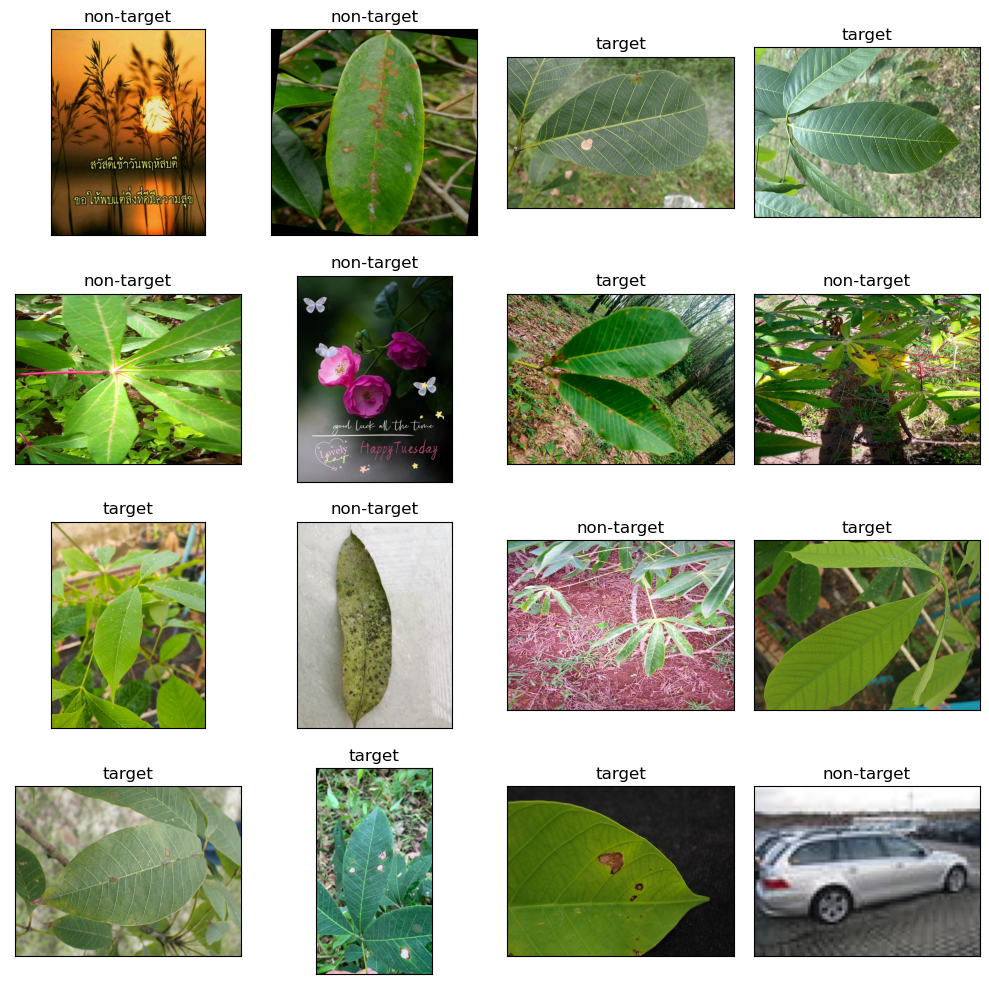

In [7]:
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [8]:
# creat folder
os.makedirs(TRAIN_DIRECTORY, exist_ok=True)
os.makedirs(TEST_DIRECTORY, exist_ok=True)
os.makedirs(VAL_DIRECTORY, exist_ok=True)

labels = image_df['Label'].unique()

for label in labels:
    os.makedirs(os.path.join(TRAIN_DIRECTORY, label), exist_ok=True)
    os.makedirs(os.path.join(TEST_DIRECTORY, label), exist_ok=True)
    os.makedirs(os.path.join(VAL_DIRECTORY, label), exist_ok=True)

In [14]:
train_df, rest_df = train_test_split(image_df, test_size=(VALIDATION_SIZE + TEST_SIZE), shuffle=True, random_state=2023)

val_df, test_df = train_test_split(rest_df, test_size=(TEST_SIZE / (VALIDATION_SIZE + TEST_SIZE)), shuffle=True, random_state=2023)

In [10]:
train_label_counts = train_df['Label'].value_counts()
test_label_counts = test_df['Label'].value_counts()
val_label_counts = val_df['Label'].value_counts()

print("Train Set:")
print(train_label_counts)
print(f"Sum: {sum(train_label_counts)}")

print("\nVal Set:")
print(val_label_counts)
print(f"Sum: {sum(val_label_counts)}")

print("\nTest Set:")
print(test_label_counts)
print(f"Sum: {sum(test_label_counts)}")

Train Set:
non-target    4357
target        3548
Name: Label, dtype: int64
Sum: 7905

Val Set:
non-target    524
target        464
Name: Label, dtype: int64
Sum: 988

Test Set:
non-target    539
target        450
Name: Label, dtype: int64
Sum: 989


In [11]:
for _, row in tqdm(train_df.iterrows(), total=len(train_df)):
    source_path = os.path.join(row['Filepath'])
    destination_path = os.path.join(TRAIN_DIRECTORY, row['Label'], os.path.basename(row['Filepath']))
    copyfile(source_path, destination_path)

for _, row in tqdm(val_df.iterrows(), total=len(val_df)):
    source_path = os.path.join(row['Filepath'])
    destination_path = os.path.join(VAL_DIRECTORY, row['Label'], os.path.basename(row['Filepath']))
    copyfile(source_path, destination_path)
    
for _, row in tqdm(test_df.iterrows(), total=len(test_df)):
    source_path = os.path.join(row['Filepath'])
    destination_path = os.path.join(TEST_DIRECTORY, row['Label'], os.path.basename(row['Filepath']))
    copyfile(source_path, destination_path)

100%|███████████████████████████████████████████████████████████████████████████████| 989/989 [00:06<00:00, 142.20it/s]
